# Lab 1: Exploratory Data Analysis (EDA)

## Task 2
1. Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).
2. Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
3. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
4. Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).
5. Make sure your conclusions are related to the question you have formulated.

### 1. Formulate a particular question that might be interesting to answer by exploring this dataset

## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe. Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file. The file loans_train.csv is expected to be in the same directory as this notebook.

In [2]:
df = pd.read_csv('./bank.csv')

# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

We can see that the dataset has 2000 (start index is 0) data rows, and both numerical and categorical attributes. The data rows are typically called observations or examples, and the columns are also called attributes or features.

The last attribute `subscribed` indicates whether a client has subscribed a term deposit (yes) or not (no). This attribute would be a primary candidate for an attribute to *learn* to predict from the values of the other attributes. Before building a predictive model, though, the first step is to get to know the dataset better (the goal of this exercise) and prepare it for machine learning (the goal of the next exercise).

#### B.1. Quick Examination of Numerical Attributes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

There are a few inferences we can draw by looking at the output of `describe()`:

- `age` has (2000 – 1988) 22 missing values.

Note that `pdays` has a minus value for it's minimum output, I notice from the dataset the -1 corresponds with anyone who has `previous` = 0 (that is 0 previous contacts before this campaign). From the UCI website it says 999 should be used when a client has not previously been contacted. Is it the case the it ranges from 0-999, so -1 corresponds to 999?

I can see from `balance` that the min and max values are quite extreme, this could effect our averages. The std = ~3131.22 whereas the median is only 551

The difference between the mean and median for age is also notable.

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

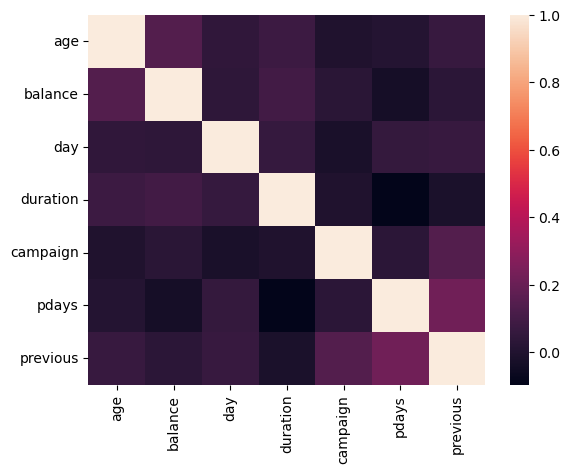

In [6]:
#correlation matrix
sns.heatmap(df.corr());

The heat map suggests that there isn't much notable correlation between attributes. Maybe we could say previous and `pdays` which makes sense, since `previous` corresponds to "number of contacts before this campaign" & `pdays` corresponds to "number of days passed since last contact" There would have to be some value for pdays if there was a value for previous

We can further examine the pairwise distribution between `previous`, and `pdays` a **pair plot**.

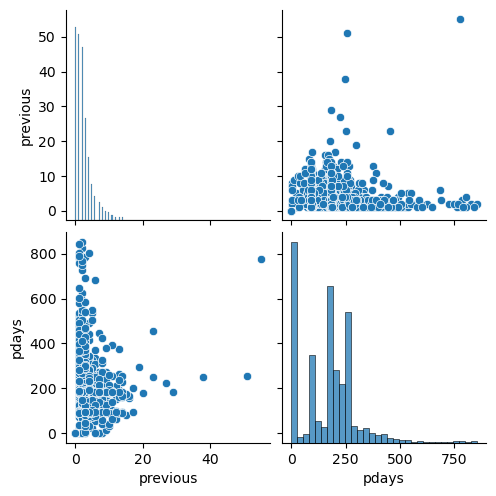

In [7]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['previous','pdays']].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

#### B.2. Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. `Job`, `Marital`, `Education`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `Education` the frequency table can be printed by the command:

In [8]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

We can see that the number of applicants with secondary education in the dataset almost equal to the number of aplicants with primary & tertiary combined. We can also check the total count of values in column `education` with the command:

In [9]:
df['education'].count()

1896

That is, there are 104 missing values in column `education`.

## C. Distribution Analysis for Numerical Atributes

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes. 

Let's take, for example, the numerical attributes `balance` and `age`. 

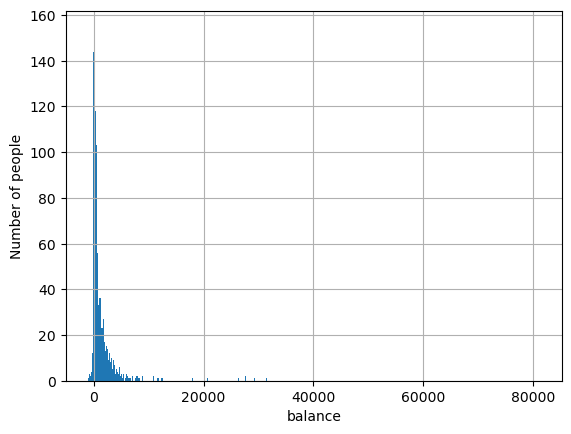

In [10]:
# Let's start by plotting a histogram of balance using the command:
# plt.figure(figsize=(12,12))
df['balance'].hist(bins=1000)
plt.xlabel('balance')
plt.ylabel('Number of people')
plt.show()

In the histogram above, we observe that there are few extreme values of `balance`, the max is around 80,000 which is a mojaor outlier The use of 1000 bins is to try depict the distribution clearly. As the median is around 500, but the outlier requires us to step quite large to get to 80,000.

Next, we look at boxplots to understand the distribution better.

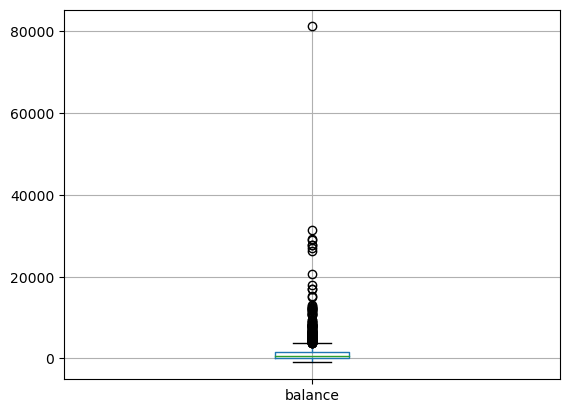

In [11]:
df.boxplot(column='balance')
plt.show()

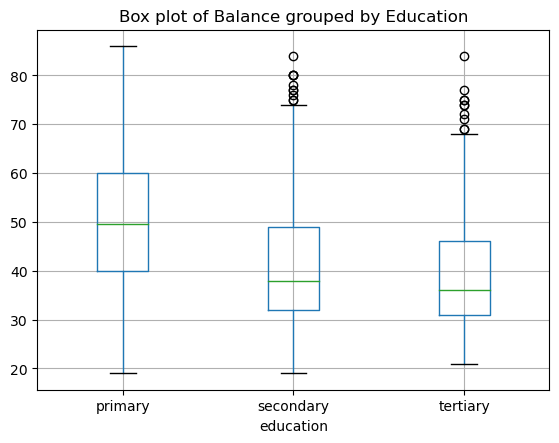

In [12]:
# Boxp lots of balance, grouped by the categorical attribute Education
df.boxplot(column='age', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

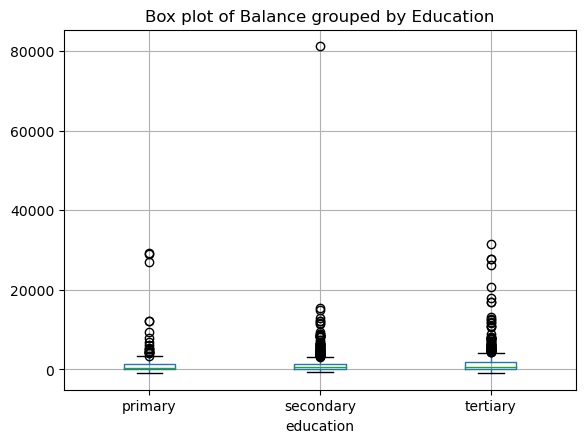

In [13]:
# Boxp lots of balance, grouped by the categorical attribute Education
df.boxplot(column='balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is no substantial difference between the mean income of primary graduates and secondary graduates. It looks like tertiary graduates make have a higher balance but it is worth nothing that the outlier makes any differences seem small but if the outlier was removed the may look significantly different.

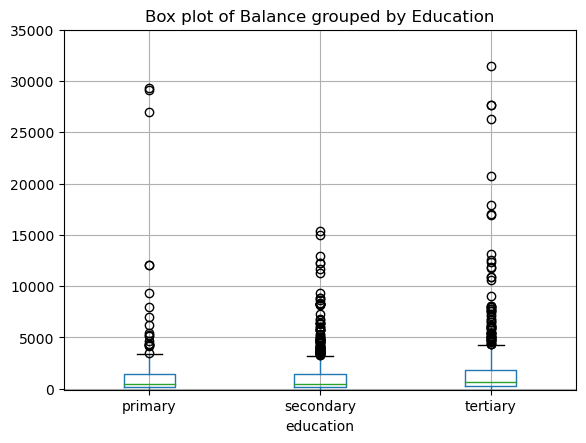

In [14]:
df.boxplot(column='balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.ylim(-100, 35000)
## plt.xlim(0,10)
plt.show()

With the y limit set to 35000, removing the max outlier, we see more clear. It's interesting that there are some high `balance` to primary graduates, I wonder if the `eduction level` correlates to the `balance` or if the `balance` correlated to the `eduction level`.
We see more higher `balance` for tertiary `eduction level`

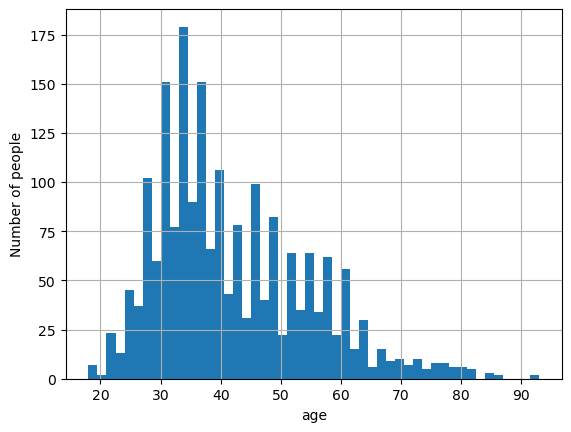

In [15]:
# Next, we examine a histogram of the numerical attribute age

df['age'].hist(bins=50)
plt.xlabel("age")
plt.ylabel('Number of people')
plt.show()

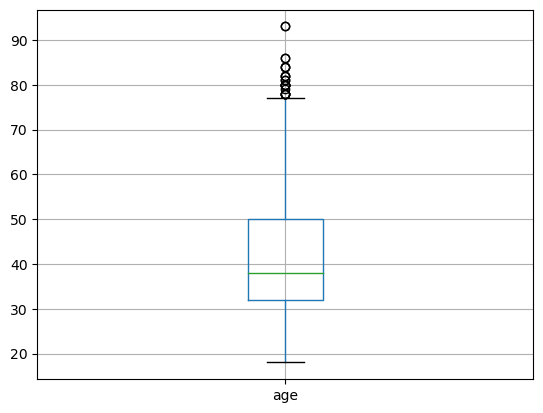

In [16]:
# Boxp lot of age
df.boxplot(column='age')
plt.show()

Again, there are some extreme values. Clearly, both `balance` and `age` require some amount of data munging. `age` has missing values as well as many extreme values, while `balance` has a few extreme values, which demand deeper understanding. We will take this up in the next lab exercise.

Finally, let's examine the relationship between `balance` and `age` with a scatter plot.

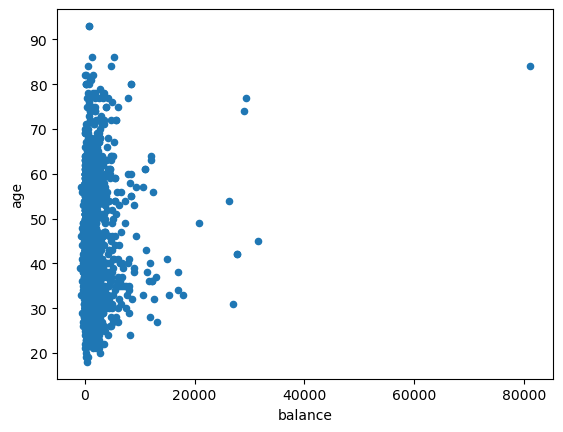

In [17]:
df.plot.scatter(x='balance', y='age')
plt.show()

Based on this scatter plot we can say that there isn't any noticeable correaltion betwenn the two. To keep with the example given we can try see if there is any trend clearer with `Seaborn's regplot`, which draws a line that best fits the relation between two numeric attributes.

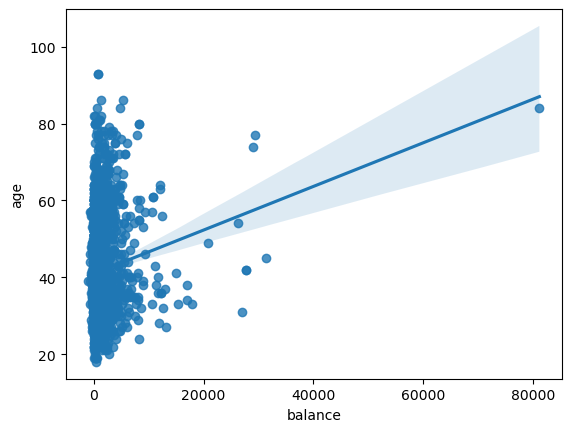

In [18]:
sns.regplot(data=df, x='balance', y='age')
plt.show()

I think the outlier gives the impression that an increse in `age` equals an increase in  `balance`. I don't think it's accurate

## D. Box Plot Variations

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

In [19]:
#First, let's draw a seaborn-style box plot for age

sns.boxplot(x=df['age'], orient='v', width=0.2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


In [20]:
#Violin plot for age

sns.violinplot(x=df['age'], orient='v', width=0.5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


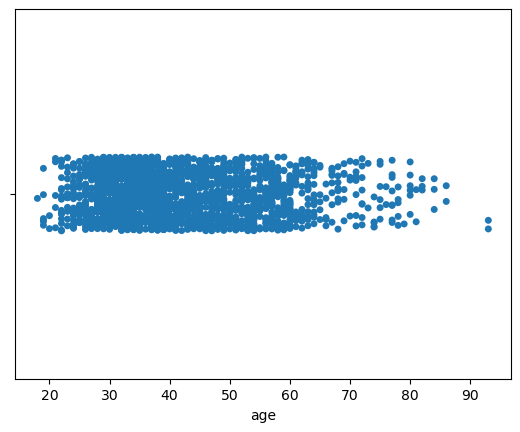

In [21]:
#Strip plot for age

sns.stripplot(x=df['age'], jitter=True, orient='v')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


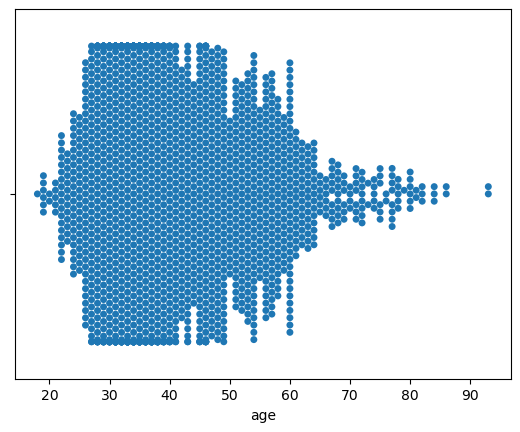

In [22]:
#Swar mplot for age

sns.swarmplot(x=df['age'], orient='v')
plt.show()

Let's redraw the box plots of `balance` grouped by the categorical attribute `education` as violin plots

In [23]:
sns.violinplot(data=df, x='education', y='balance')
plt.show()

Again, we see the outlier distorts the look of the data, here it looks like `secondary education` correlates to high `balance`

We can split each violin plot by a binary attribute. For example, we can add `loan` to the plot above as follows.

In [24]:
sns.violinplot(data=df, x='education', y='balance', hue='loan', split=True)
plt.show()

The plot above suggest that there is not much difference between the loan status of either education level

## E. Distribution Analysis for Categorical Attributes

As noted above `default` is rather a categorical attribute with two categories/values:
- 0 - the applicant has no credic history
- 1 - the applicant has a credit history

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `default` and `subscribed`.

First, let's take a look at the frequency table for attribute `default`:

In [25]:
frequency_table = df['default'].value_counts(ascending=True)
print('Frequency Table for default History:') 
print(frequency_table)

Frequency Table for default History:
yes      15
no     1985
Name: default, dtype: int64


Next, build a pivot table for `subscribed` and `default`, i.e. find the mean `subscribed` for both `default`=0 and `default`=1.

In [26]:
pivot_table_LC = df.pivot_table(values='subscribed',
                                index='default',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

Here the values of `subscribed` are grouped by the index `default`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `subscribed` are replaced by 1s and 0s, respectively.

In [27]:
# Print pivot table
print(pivot_table_LC)

         subscribed
default            
no         0.503275
yes        0.066667


The pivot table can be interprted as follows. The probability of a client subscribing to a term deposit is 0.066667 (i.e. ~7%) for applicants who have credit in default, and 0.503275 (i.e. ~50%) for applicants wwho have no credit in default.

Let's plot `default` and the probability of getting a loan based on `default`.

In [28]:
# Plot the frequency table for default
frequency_table.plot(kind='bar')
plt.xlabel('default status')
plt.ylabel('Number of Applicants')
plt.title('Applicants by default status')
plt.show()

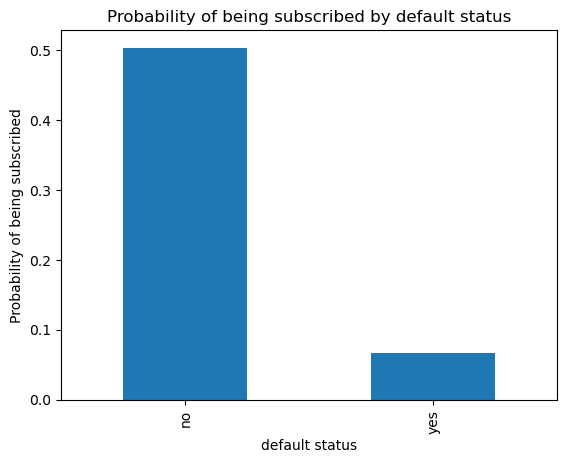

In [29]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('default status')
plt.ylabel('Probability of being subscribed')
plt.title('Probability of being subscribed by default status')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

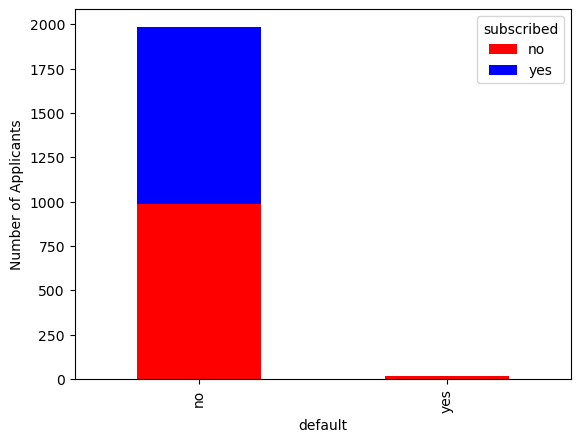

In [30]:
crosstab_CL = pd.crosstab(df['default'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

Furthermore, we can stackchart `default` and `loan` against `subscribed`.

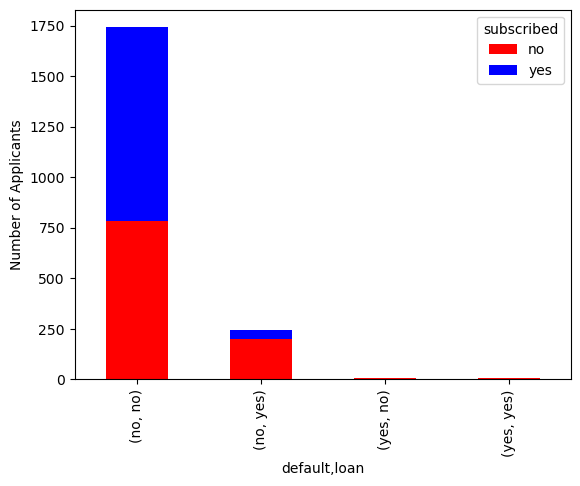

In [31]:
crosstab_CGL = pd.crosstab([df['default'], df['loan']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

The plot above suggests that loan status does play a role when taking a decision for subscribing.To see this clearer, we can build a pivot table with the mean values of `subscribed` for each combination of values of `default` and `loan` and then visualise this pivot table as a heat map.

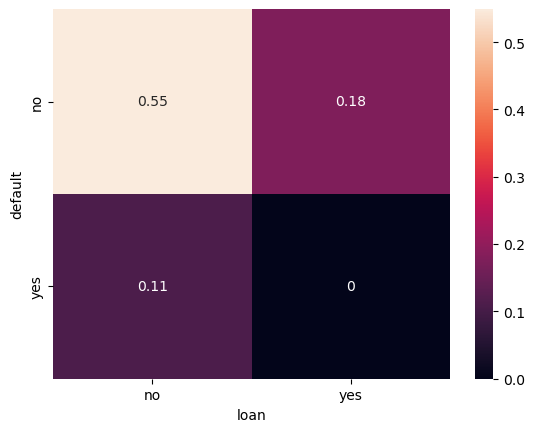

In [32]:
pivot_table_LCG = df.pivot_table(values='subscribed', 
                           index='default', 
                           columns='loan',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

We can see that there is 0 likelyhood of getting loan if you have credit in default.